In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

<Figure size 1000x600 with 0 Axes>

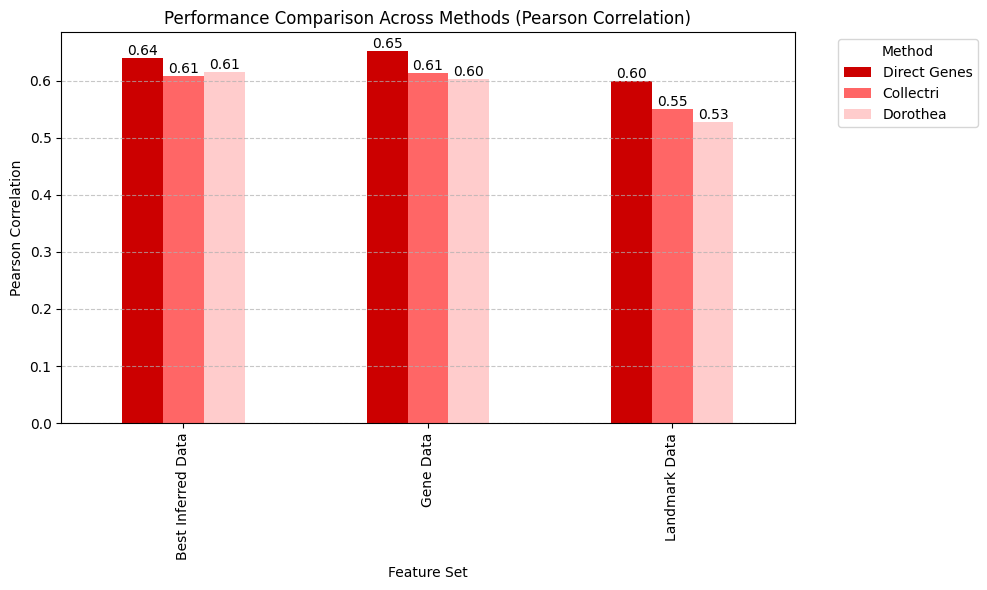

In [ ]:
# Dummy file paths (replace these with your actual file paths)
genes_csv = "../assets/tables/Phase 2/Performance Genes.csv"
collectri_csv = "../assets/tables/Phase 2/Performance Collectri.csv"
dorothea_csv = "../assets/tables/Phase 2/Performance Dorothea.csv"

# Read the CSV files.
# We assume that each CSV contains at least the columns:
# "Dataset_and_Model" and "Pearson Correlation"
df_genes = pd.read_csv(genes_csv)
df_collectri = pd.read_csv(collectri_csv)
df_dorothea = pd.read_csv(dorothea_csv)

# Add a column to each DataFrame to indicate the method.
df_genes["Method"] = "Direct Genes"
df_collectri["Method"] = "Collectri"
df_dorothea["Method"] = "Dorothea"

# If your CSV files have an index column that is not already a regular column,
# you might need to reset the index. For example:
# df_genes = df_genes.reset_index()
# (Do this if necessary based on your CSV file format.)

# Combine all DataFrames into one.
combined_df = pd.concat([df_genes, df_collectri, df_dorothea], ignore_index=True)
logging.info(f"Combined DataFrame:\n{combined_df}")

# Create a pivot table where:
# - Index: Feature set ("Dataset_and_Model")
# - Columns: Method ("Method")
# - Values: Pearson Correlation
pivot_df = combined_df.pivot(
    index="Dataset_and_Model", columns="Method", values="Pearson Correlation"
)

# Reorder columns (if needed) to your desired order.
desired_order = ["Direct Genes", "Collectri", "Dorothea"]
pivot_df = pivot_df[desired_order]

# Define colors (tints of red) for each method.
colors = {
    "Direct Genes": "#cc0000",  # dark red
    "Collectri": "#ff6666",  # medium red
    "Dorothea": "#ffcccc",  # light red
}
color_list = [colors[m] for m in desired_order]

# Create the grouped bar chart.
plt.figure(figsize=(10, 6))
ax = pivot_df.plot(kind="bar", color=color_list, figsize=(10, 6))
plt.xlabel("Feature Set")
plt.ylabel("Pearson Correlation")
plt.title("Performance Comparison Across Methods (Pearson Correlation)")

# Annotate each bar with the value rounded to two decimals.
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge")

# Move the legend outside the plot.
ax.legend(title="Method", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save and show the plot.
plot_filepath = "performance_comparison_grouped_bar.png"
plt.savefig(plot_filepath)
plt.show()

logging.info(f"Plot saved as {plot_filepath}")

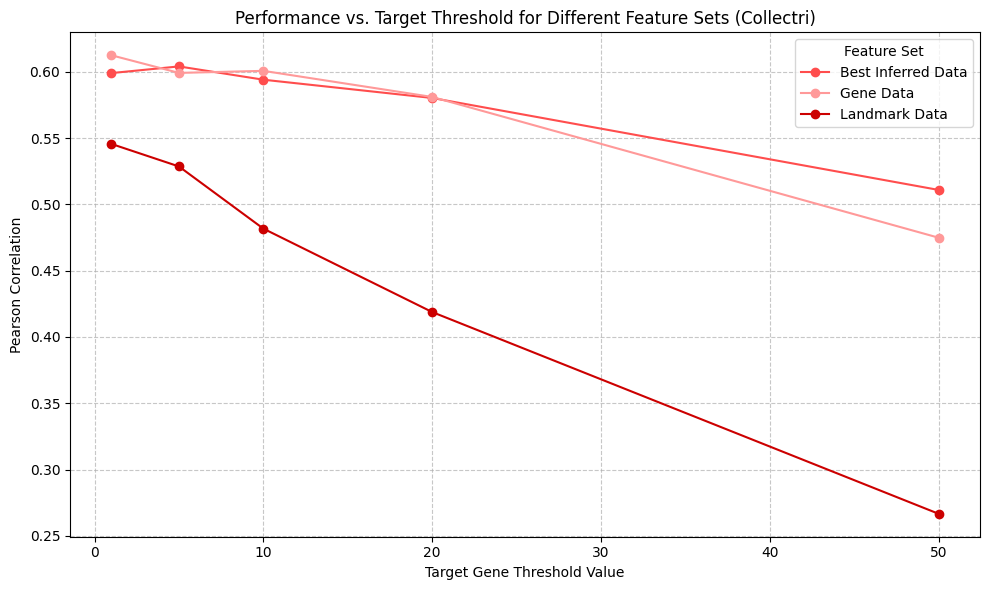

2025-02-12 09:28:26,266 - INFO - Plot saved as performance_vs_min_n_dorothea.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

# Configure logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

# Dummy file path for the Dorothea CSV file (replace with your actual file path)
csv_filepath = "../assets/tables/Phase 2/Performance Collectri Min Targets.csv"

# Read the CSV file.
# The CSV file is expected to contain at least the columns:
# "Dataset_and_Model", "Network_min_n", "MSE", "MAE", "R²", "Pearson Correlation"
df = pd.read_csv(csv_filepath)

# If the CSV file was created with a MultiIndex, reset the index:
# df = df.reset_index()

# Extract the numeric threshold value from the "Network_min_n" column.
# We assume the format is "dorothea_min_n_{min_n}", so splitting by "_" yields:
# ["dorothea", "min", "n", "{min_n}"]
df["min_n"] = pd.to_numeric(df["min_n"].str.split("_").str[3], errors="coerce")
df = df.dropna(subset=["min_n"])
df["min_n"] = df["min_n"].astype(int)

# Create a dictionary to store (min_n, R²) pairs for each feature set.
performance_data = {}
for dataset_name, group in df.groupby("Dataset_and_Model"):
    group = group.sort_values("min_n")
    min_n_vals = group["min_n"].tolist()
    r2_vals = group["Pearson Correlation"].tolist()
    performance_data[dataset_name] = (min_n_vals, r2_vals)

# Define colors (tints of red) for the different feature sets.
colors = {
    "Landmark Data": "#cc0000",  # light red "#cc0000"
    "Best Inferred Data": "#ff4d4d",  # medium red
    "Gene Data": "#ff9999",  # dark red
}

# Create the line plot.
plt.figure(figsize=(10, 6))
for dataset_name, (min_n_vals, r2_vals) in performance_data.items():
    plt.plot(
        min_n_vals,
        r2_vals,
        marker="o",
        label=dataset_name,
        color=colors.get(dataset_name, "#000000"),
    )
    # # Annotate each data point with the R² value (rounded to two decimals).
    # for x, y in zip(min_n_vals, r2_vals):
    #     plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=9)

plt.xlabel("Target Gene Threshold Value")
plt.ylabel("Pearson Correlation")
plt.title("Performance vs. Target Threshold for Different Feature Sets (Collectri)")
plt.legend(title="Feature Set", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot to a file.
plot_filepath = "performance_vs_min_n_dorothea.png"
plt.savefig(plot_filepath)
plt.show()

logging.info(f"Plot saved as {plot_filepath}")

2025-02-12 11:18:22,927 - INFO - CSV file read. Head of the DataFrame:
2025-02-12 11:18:22,929 - INFO -     Dataset_and_Model Network_min_n_Algorithm       MSE       MAE        R²  \
0       Landmark Data   collectri_min_n_1_ulm  0.035437  0.120884  0.286572   
1  Best Inferred Data   collectri_min_n_1_ulm  0.033500  0.113305  0.325571   
2           Gene Data   collectri_min_n_1_ulm  0.032344  0.115005  0.348827   
3       Landmark Data   collectri_min_n_1_mlm  0.035437  0.120884  0.286572   
4  Best Inferred Data   collectri_min_n_1_mlm  0.033349  0.110416  0.328612   

   Pearson Correlation  
0             0.553642  
1             0.615453  
2             0.601837  
3             0.518662  
4             0.608076  
2025-02-12 11:18:22,941 - INFO - DataFrame after extracting composite key:


2025-02-12 11:18:22,943 - INFO -     Dataset_and_Model Network_min_n_Algorithm       MSE       MAE        R²  \
0       Landmark Data   collectri_min_n_1_ulm  0.035437  0.120884  0.286572   
1  Best Inferred Data   collectri_min_n_1_ulm  0.033500  0.113305  0.325571   
2           Gene Data   collectri_min_n_1_ulm  0.032344  0.115005  0.348827   
3       Landmark Data   collectri_min_n_1_mlm  0.035437  0.120884  0.286572   
4  Best Inferred Data   collectri_min_n_1_mlm  0.033349  0.110416  0.328612   

   Pearson Correlation    Network  min_n Algorithm  
0             0.553642  collectri      1       ulm  
1             0.615453  collectri      1       ulm  
2             0.601837  collectri      1       ulm  
3             0.518662  collectri      1       mlm  
4             0.608076  collectri      1       mlm  
C:\Users\20191678\AppData\Local\Temp\ipykernel_20252\2208887425.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.

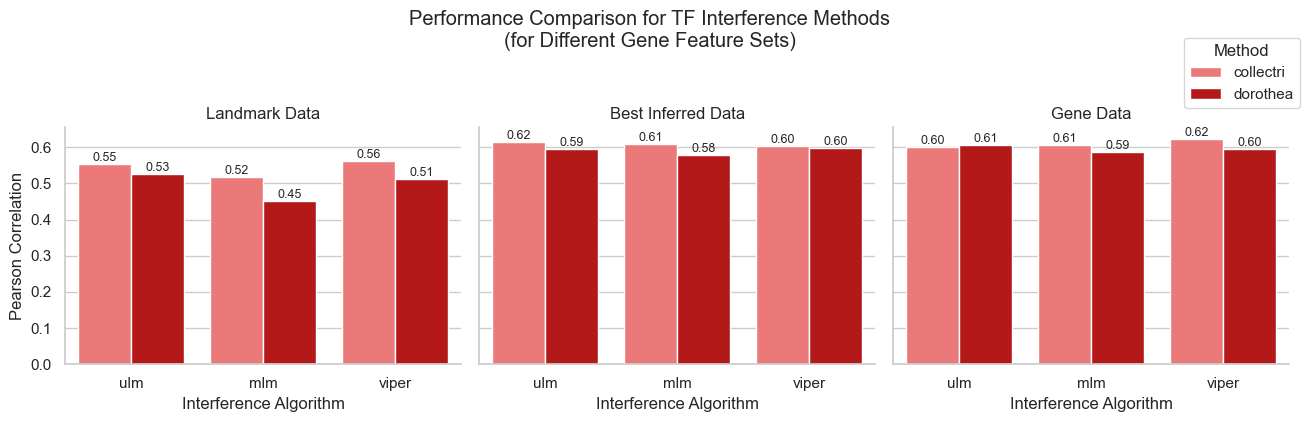

2025-02-12 11:18:24,055 - INFO - Plot saved as performance_comparison_faceted.png


: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configure logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

# Dummy file path for the CSV file with all results.
csv_filepath = "../assets/tables/Phase 2/Performance Algos.csv"  # replace with your actual file path

# Read the CSV file.
df = pd.read_csv(csv_filepath, index_col=[0, 1])
df = df.reset_index()

logging.info("CSV file read. Head of the DataFrame:")
logging.info(df.head())

# Check that the composite key column exists.
composite_col = "Network_min_n_Algorithm"
if composite_col not in df.columns:
    logging.error(
        f"Column '{composite_col}' not found in CSV. Available columns: {df.columns.tolist()}"
    )
    raise ValueError(f"Column '{composite_col}' not found.")

# Use a regex to extract parts from the composite key.
regex = r"^(?P<Network>\w+)_min_n_(?P<min_n>\d+)_(?P<Algorithm>\w+)$"
extracted = df[composite_col].str.extract(regex)
if extracted.isnull().any().any():
    logging.warning(
        "Some composite keys could not be parsed. Check the format of your composite keys."
    )
df = pd.concat([df, extracted], axis=1)
df["min_n"] = pd.to_numeric(df["min_n"], errors="coerce")
df = df.dropna(subset=["min_n"])
df["min_n"] = df["min_n"].astype(int)
df["Network"] = df["Network"].str.lower()
df["Algorithm"] = df["Algorithm"].str.lower()

logging.info("DataFrame after extracting composite key:")
logging.info(df.head())

# Create a facet grid: one column per feature set.
sns.set(style="whitegrid")
g = sns.catplot(
    data=df,
    kind="bar",
    x="Algorithm",
    y="Pearson Correlation",
    hue="Network",
    col="Dataset_and_Model",
    palette={"collectri": "#ff6666", "dorothea": "#cc0000"},
    height=4,
    aspect=1,
    ci=None,
)

# Customize axes and titles.
g.set_axis_labels("Interference Algorithm", "Pearson Correlation")
g.set_titles("{col_name}")
g.fig.suptitle(
    "Performance Comparison for TF Interference Methods\n(for Different Gene Feature Sets)",
    y=1.05,
)

# Annotate each bar with its value rounded to two decimals.
for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)

# Remove the default legend from the facets...
if g._legend is not None:
    g._legend.remove()

# ... and add a single legend at the top right of the overall figure.
g.fig.legend(title="Method", loc="upper right", bbox_to_anchor=(1, 1))

plt.tight_layout()
plot_filepath = "performance_comparison_faceted.png"
plt.savefig(plot_filepath, bbox_inches="tight")
plt.show()

logging.info(f"Plot saved as {plot_filepath}")